In [26]:
import pandas as pd

In [27]:
df=pd.read_csv(r"C:\Users\pasqu\Desktop\Data Analyst\Progetto scuole\Personale 2024.csv")
df

,ANNOSCOLASTICO,PROVINCIA,ORDINESCUOLA,TIPOPOSTO,FASCIAETA,DOCENTITITOLARIMASCHI,DOCENTITITOLARIFEMMINE
0,202324,COSENZA,SCUOLA SECONDARIA II GRADO,SOSTEGNO,TRA 45 E 54,30,126
1,202324,VICENZA,SCUOLA PRIMARIA,SOSTEGNO,OLTRE 54,6,59
2,202324,VERCELLI,SCUOLA PRIMARIA,SOSTEGNO,TRA 35 E 44,1,14
3,202324,ASTI,SCUOLA SECONDARIA I GRADO,SOSTEGNO,TRA 35 E 44,2,8
4,202324,ASCOLI PICENO,SCUOLA INFANZIA,NORMALE,TRA 45 E 54,3,146
...,...,...,...,...,...,...,...
3293,202324,TERAMO,SCUOLA SECONDARIA II GRADO,SOSTEGNO,TRA 45 E 54,24,82
3294,202324,TERAMO,SCUOLA PRIMARIA,SOSTEGNO,FINO A 34,0,25
3295,202324,TERNI,SCUOLA PRIMARIA,SOSTEGNO,OLTRE 54,1,17
3296,202324,TERAMO,SCUOLA SECONDARIA II GRADO,SOSTEGNO,FINO A 34,0,1


In [28]:
df.head()

,ANNOSCOLASTICO,PROVINCIA,ORDINESCUOLA,TIPOPOSTO,FASCIAETA,DOCENTITITOLARIMASCHI,DOCENTITITOLARIFEMMINE
0,202324,COSENZA,SCUOLA SECONDARIA II GRADO,SOSTEGNO,TRA 45 E 54,30,126
1,202324,VICENZA,SCUOLA PRIMARIA,SOSTEGNO,OLTRE 54,6,59
2,202324,VERCELLI,SCUOLA PRIMARIA,SOSTEGNO,TRA 35 E 44,1,14
3,202324,ASTI,SCUOLA SECONDARIA I GRADO,SOSTEGNO,TRA 35 E 44,2,8
4,202324,ASCOLI PICENO,SCUOLA INFANZIA,NORMALE,TRA 45 E 54,3,146


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3298 entries, 0 to 3297
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ANNOSCOLASTICO          3298 non-null   int64 
 1   PROVINCIA               3298 non-null   object
 2   ORDINESCUOLA            3298 non-null   object
 3   TIPOPOSTO               3298 non-null   object
 4   FASCIAETA               3298 non-null   object
 5   DOCENTITITOLARIMASCHI   3298 non-null   int64 
 6   DOCENTITITOLARIFEMMINE  3298 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 180.5+ KB


In [30]:
df.describe()

,ANNOSCOLASTICO,DOCENTITITOLARIMASCHI,DOCENTITITOLARIFEMMINE
count,3298.0,3298.000000,3298.000000
mean,202324.0,39.302001,182.115221
std,0.0,108.049601,381.285148
min,202324.0,0.000000,0.000000
25%,202324.0,1.000000,20.000000
50%,202324.0,6.000000,60.000000
75%,202324.0,30.000000,194.750000
max,202324.0,2328.000000,6210.000000


In [31]:
df["PROVINCIA"].nunique()

104

In [32]:
df["PROVINCIA"].value_counts

<bound method IndexOpsMixin.value_counts of 0             COSENZA
1             VICENZA
2            VERCELLI
3                ASTI
4       ASCOLI PICENO
            ...      
3293           TERAMO
3294           TERAMO
3295            TERNI
3296           TERAMO
3297            LECCO
Name: PROVINCIA, Length: 3298, dtype: object>

In [33]:
df["ORDINESCUOLA"].unique()

array(['SCUOLA SECONDARIA II GRADO', 'SCUOLA PRIMARIA',
       'SCUOLA SECONDARIA I GRADO', 'SCUOLA INFANZIA'], dtype=object)

In [34]:
df["TIPOPOSTO"].unique()

array(['SOSTEGNO', 'NORMALE'], dtype=object)

ANALISI 

In [35]:
df["TOTALE_DOCENTI"] = df["DOCENTITITOLARIFEMMINE"]+ df["DOCENTITITOLARIMASCHI"]

In [36]:
df["%femm"] = (df["DOCENTITITOLARIFEMMINE"]/df["TOTALE_DOCENTI"])*100
df["%femm"] 

0        80.769231
1        90.769231
2        93.333333
3        80.000000
4        97.986577
           ...    
3293     77.358491
3294    100.000000
3295     94.444444
3296    100.000000
3297     60.810811
Name: %femm, Length: 3298, dtype: float64

TOTALE NAZIONALE

In [37]:
totale_maschi = df["DOCENTITITOLARIMASCHI"].sum()


In [38]:
totale_donne = df["DOCENTITITOLARIFEMMINE"].sum()


In [39]:
print(f"TOTALE maschi: {totale_maschi:,}")
print(f"TOTALE DONNE: {totale_donne:,}")
print(f"TOTALE DOCENTi : {totale_maschi + totale_donne:,}")
print (f"% Femmine: {((totale_donne)/(totale_donne + totale_maschi))*100:.1f}%")

TOTALE maschi: 129,618
TOTALE DONNE: 600,616
TOTALE DOCENTi : 730,234
% Femmine: 82.2%


NON CI FERMIMAMO AL DATO AGGREGATO, VEDIAMO LA DIFFERENZA TRA I SESSI NEI VARI ORDINI SCOLASTICI

In [40]:
gender_by_order = df.groupby('ORDINESCUOLA').agg({

    'DOCENTITITOLARIMASCHI': 'sum',
    'DOCENTITITOLARIFEMMINE': 'sum'
})

In [41]:
gender_by_order["TOTALE"]= gender_by_order ["DOCENTITITOLARIMASCHI"] + gender_by_order["DOCENTITITOLARIFEMMINE"]
gender_by_order ["%FEMM"] = ((gender_by_order["DOCENTITITOLARIFEMMINE"]/gender_by_order["TOTALE"])*100  )

In [42]:
print("\n📚 GENDER GAP PER ORDINE SCUOLA:")
print(gender_by_order.sort_values('%FEMM', ascending=False))


📚 GENDER GAP PER ORDINE SCUOLA:
                            DOCENTITITOLARIMASCHI  DOCENTITITOLARIFEMMINE  \
ORDINESCUOLA                                                                
SCUOLA INFANZIA                               691                   84670   
SCUOLA PRIMARIA                              8696                  228265   
SCUOLA SECONDARIA I GRADO                   35913                  121854   
SCUOLA SECONDARIA II GRADO                  84318                  165827   

                            TOTALE      %FEMM  
ORDINESCUOLA                                   
SCUOLA INFANZIA              85361  99.190497  
SCUOLA PRIMARIA             236961  96.330198  
SCUOLA SECONDARIA I GRADO   157767  77.236684  
SCUOLA SECONDARIA II GRADO  250145  66.292350  


STESSA TIPO DI ANALISI MA PER TIPO DI POSTO

In [43]:
gender_by_type = df.groupby("TIPOPOSTO").agg({

    'DOCENTITITOLARIMASCHI': 'sum',
    'DOCENTITITOLARIFEMMINE': 'sum'
    })

In [44]:
gender_by_type['TOTALE'] = gender_by_type['DOCENTITITOLARIMASCHI'] + gender_by_type['DOCENTITITOLARIFEMMINE']
gender_by_type['%FEMM'] = ((gender_by_type['DOCENTITITOLARIFEMMINE']/gender_by_type['TOTALE'])*100)

In [45]:
print ("\n GENDER GAP SOSTEGNO vs NORMALE:")
print(gender_by_type.sort_values('%FEMM', ascending=False))


 GENDER GAP SOSTEGNO vs NORMALE:
           DOCENTITITOLARIMASCHI  DOCENTITITOLARIFEMMINE  TOTALE      %FEMM
TIPOPOSTO                                                                  
SOSTEGNO                   14708                   84046   98754  85.106426
NORMALE                   114910                  516570  631480  81.803066


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

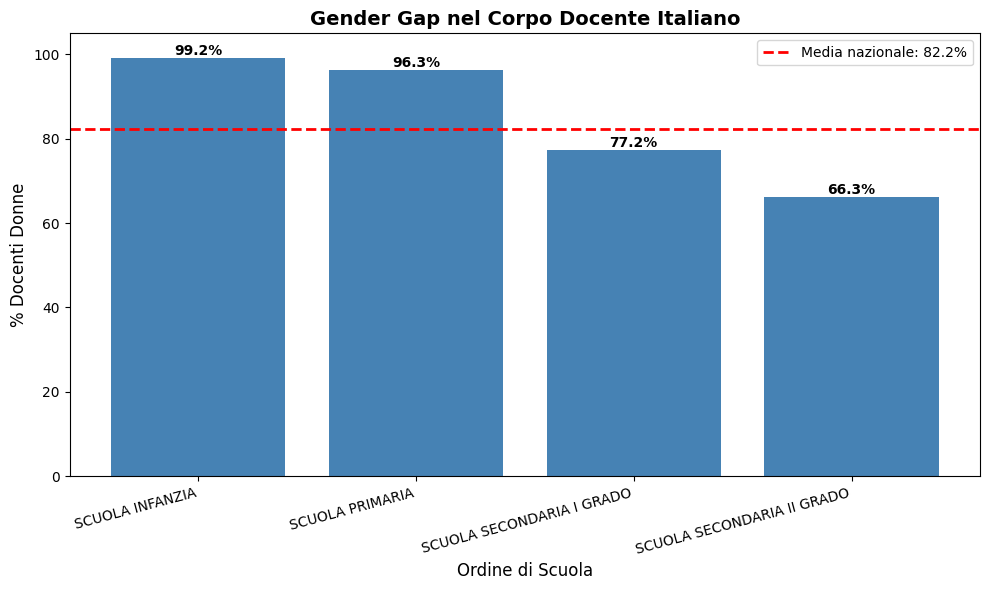

In [47]:
plt.figure(figsize=(10, 6))
bars = plt.bar(gender_by_order.index, gender_by_order['%FEMM'], color='steelblue')
plt.axhline(y=82.2, color='red', linestyle='--', linewidth=2, label='Media nazionale: 82.2%')
plt.ylabel('% Docenti Donne', fontsize=12)
plt.xlabel('Ordine di Scuola', fontsize=12)
plt.title('Gender Gap nel Corpo Docente Italiano', fontsize=14, fontweight='bold')
plt.ylim(0, 105)
plt.xticks(rotation=15, ha='right')

# Valori sulle barre
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.legend()
plt.tight_layout()
plt.show()

ANALISI SULLE FASCE D'ETA'

In [48]:
df.columns

Index(['ANNOSCOLASTICO', 'PROVINCIA', 'ORDINESCUOLA', 'TIPOPOSTO', 'FASCIAETA',
       'DOCENTITITOLARIMASCHI', 'DOCENTITITOLARIFEMMINE', 'TOTALE_DOCENTI',
       '%femm'],
      dtype='object')

In [49]:
age_dist = df.groupby('FASCIAETA').agg({


    'DOCENTITITOLARIMASCHI': 'sum',
    'DOCENTITITOLARIFEMMINE': 'sum'

})

In [50]:
age_dist['TOTALE'] = age_dist["DOCENTITITOLARIMASCHI"] + age_dist["DOCENTITITOLARIFEMMINE"]

age_dist['%FEMM'] = ((age_dist['DOCENTITITOLARIFEMMINE']/age_dist['DOCENTITITOLARIMASCHI'])*100)

In [51]:
print("\n Fasce 'età tra i sessi:")
print(age_dist.sort_values('%FEMM' , ascending= True))


 Fasce 'età tra i sessi:
             DOCENTITITOLARIMASCHI  DOCENTITITOLARIFEMMINE  TOTALE       %FEMM
FASCIAETA                                                                     
FINO A 34                    10145                   27821   37966  274.233613
TRA 35 E 44                  25053                  103473  128526  413.016405
OLTRE 54                     54581                  254783  309364  466.797970
TRA 45 E 54                  39839                  214539  254378  538.515023


Text(0.5, 0, 'Fasce età tra i sessi')

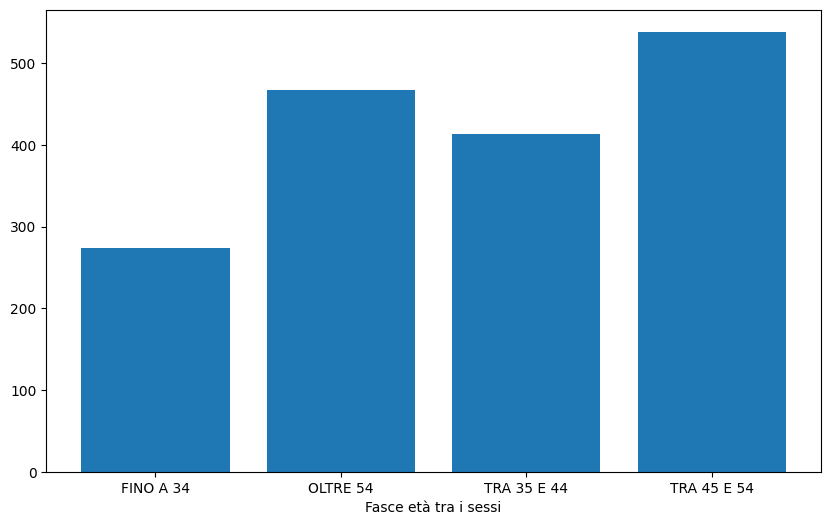

In [52]:
plt.figure(figsize=(10,6))
bars= plt.bar(age_dist.index, age_dist['%FEMM'])
plt.xlabel('Fasce età tra i sessi')

DISTRIBUZIONE GEOGRAFICA

In [53]:
geo_dist = df.groupby('PROVINCIA').agg({

    'DOCENTITITOLARIMASCHI': 'sum',
    'DOCENTITITOLARIFEMMINE': 'sum'
})

In [54]:
geo_dist['TOTALE']= geo_dist['DOCENTITITOLARIMASCHI']+ geo_dist['DOCENTITITOLARIFEMMINE']

geo_dist['%FEMM'] =  ((geo_dist['DOCENTITITOLARIFEMMINE']/geo_dist['TOTALE'])*100)

In [55]:
print("\n DISTRIBUZIONE GEOGRAFICA PER SESSO ")
print(geo_dist.sort_values('TOTALE', ascending=True).head(10))


 DISTRIBUZIONE GEOGRAFICA PER SESSO 
                      DOCENTITITOLARIMASCHI  DOCENTITITOLARIFEMMINE  TOTALE  \
PROVINCIA                                                                     
ISERNIA                                 223                     957    1180   
GORIZIA                                 310                    1408    1718   
BIELLA                                  360                    1558    1918   
VERBANO-CUSIO-OSSOLA                    423                    1539    1962   
ORISTANO                                412                    1582    1994   
VERCELLI                                370                    1650    2020   
SONDRIO                                 384                    1730    2114   
ASTI                                    349                    1779    2128   
FERMO                                   373                    1823    2196   
RIETI                                   400                    1834    2234   

             

In [56]:
print("\n PROVINCIE PIU FEMMINIZZATE >85%")
print (geo_dist[geo_dist['%FEMM']> 85 ].sort_values('%FEMM',ascending = False).head(10))


 PROVINCIE PIU FEMMINIZZATE >85%
           DOCENTITITOLARIMASCHI  DOCENTITITOLARIFEMMINE  TOTALE      %FEMM
PROVINCIA                                                                  
PIACENZA                     403                    2569    2972  86.440108
LODI                         355                    2106    2461  85.574970
TERNI                        404                    2304    2708  85.081241


In [57]:
print("\n PROVINCIE MENO FEMMINIZZATE <78%")
print (geo_dist[geo_dist['%FEMM']<78 ].sort_values('%FEMM',ascending = False))


 PROVINCIE MENO FEMMINIZZATE <78%
               DOCENTITITOLARIMASCHI  DOCENTITITOLARIFEMMINE  TOTALE  \
PROVINCIA                                                              
VIBO VALENTIA                    640                    2216    2856   
AGRIGENTO                       1482                    4978    6460   

                   %FEMM  
PROVINCIA                 
VIBO VALENTIA  77.591036  
AGRIGENTO      77.058824  


In [58]:
# Distribuzione per fascia d'età
age_dist = df.groupby('FASCIAETA').agg({
    'DOCENTITITOLARIMASCHI': 'sum',
    'DOCENTITITOLARIFEMMINE': 'sum'
})
age_dist['TOTALE'] = age_dist['DOCENTITITOLARIMASCHI'] + age_dist['DOCENTITITOLARIFEMMINE']
age_dist['PERC_FEMMINE'] = (age_dist['DOCENTITITOLARIFEMMINE'] / age_dist['TOTALE']) * 100
age_dist['PERC_SUL_TOTALE'] = (age_dist['TOTALE'] / age_dist['TOTALE'].sum()) * 100

print("📊 DISTRIBUZIONE PER FASCIA D'ETÀ:")
print(age_dist.sort_values('TOTALE', ascending=False))

📊 DISTRIBUZIONE PER FASCIA D'ETÀ:
             DOCENTITITOLARIMASCHI  DOCENTITITOLARIFEMMINE  TOTALE  \
FASCIAETA                                                            
OLTRE 54                     54581                  254783  309364   
TRA 45 E 54                  39839                  214539  254378   
TRA 35 E 44                  25053                  103473  128526   
FINO A 34                    10145                   27821   37966   

             PERC_FEMMINE  PERC_SUL_TOTALE  
FASCIAETA                                   
OLTRE 54        82.357029        42.365050  
TRA 45 E 54     84.338661        34.835135  
TRA 35 E 44     80.507446        17.600660  
FINO A 34       73.278723         5.199155  


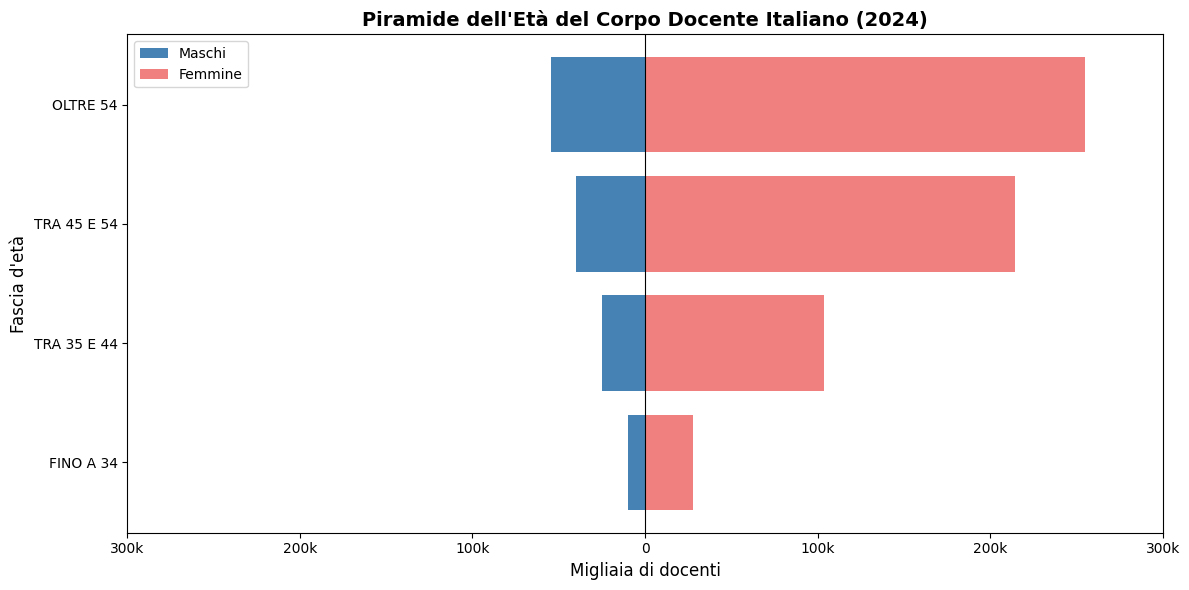

In [59]:
import matplotlib.pyplot as plt

# Ordina per età (dal più giovane al più vecchio)
age_order = ['FINO A 34', 'TRA 35 E 44', 'TRA 45 E 54', 'OLTRE 54']
age_data = age_dist.reindex(age_order)

# Grafico a barre orizzontali (piramide)
fig, ax = plt.subplots(figsize=(12, 6))

# Maschi a sinistra (negativi)
ax.barh(age_order, -age_data['DOCENTITITOLARIMASCHI']/1000, color='steelblue', label='Maschi')
# Femmine a destra (positivi)
ax.barh(age_order, age_data['DOCENTITITOLARIFEMMINE']/1000, color='lightcoral', label='Femmine')

ax.set_xlabel('Migliaia di docenti', fontsize=12)
ax.set_ylabel('Fascia d\'età', fontsize=12)
ax.set_title('Piramide dell\'Età del Corpo Docente Italiano (2024)', fontsize=14, fontweight='bold')
ax.axvline(0, color='black', linewidth=0.8)
ax.legend()

# Inverti l'asse X per avere i negativi a sinistra
ax.set_xticks([-300, -200, -100, 0, 100, 200, 300])
ax.set_xticklabels(['300k', '200k', '100k', '0', '100k', '200k', '300k'])

plt.tight_layout()
plt.show()

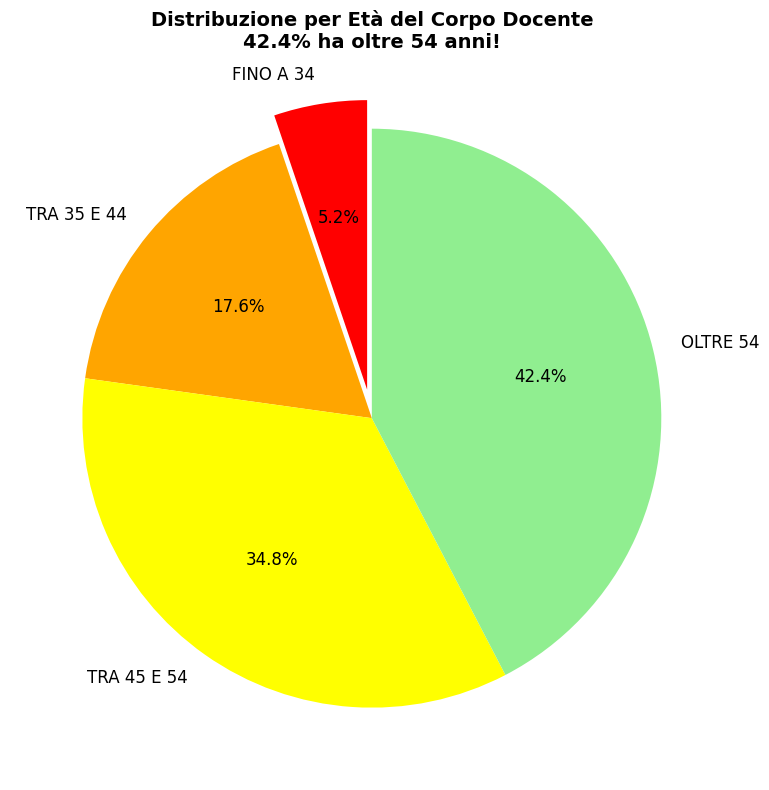

In [60]:
# Grafico a torta
plt.figure(figsize=(10, 8))
colors = ['red', 'orange', 'yellow', 'lightgreen']
explode = (0.1, 0, 0, 0)  # Evidenzia gli over 54

plt.pie(age_data['TOTALE'], labels=age_order, autopct='%1.1f%%', 
        startangle=90, colors=colors, explode=explode, textprops={'fontsize': 12})
plt.title('Distribuzione per Età del Corpo Docente\n42.4% ha oltre 54 anni!', 
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

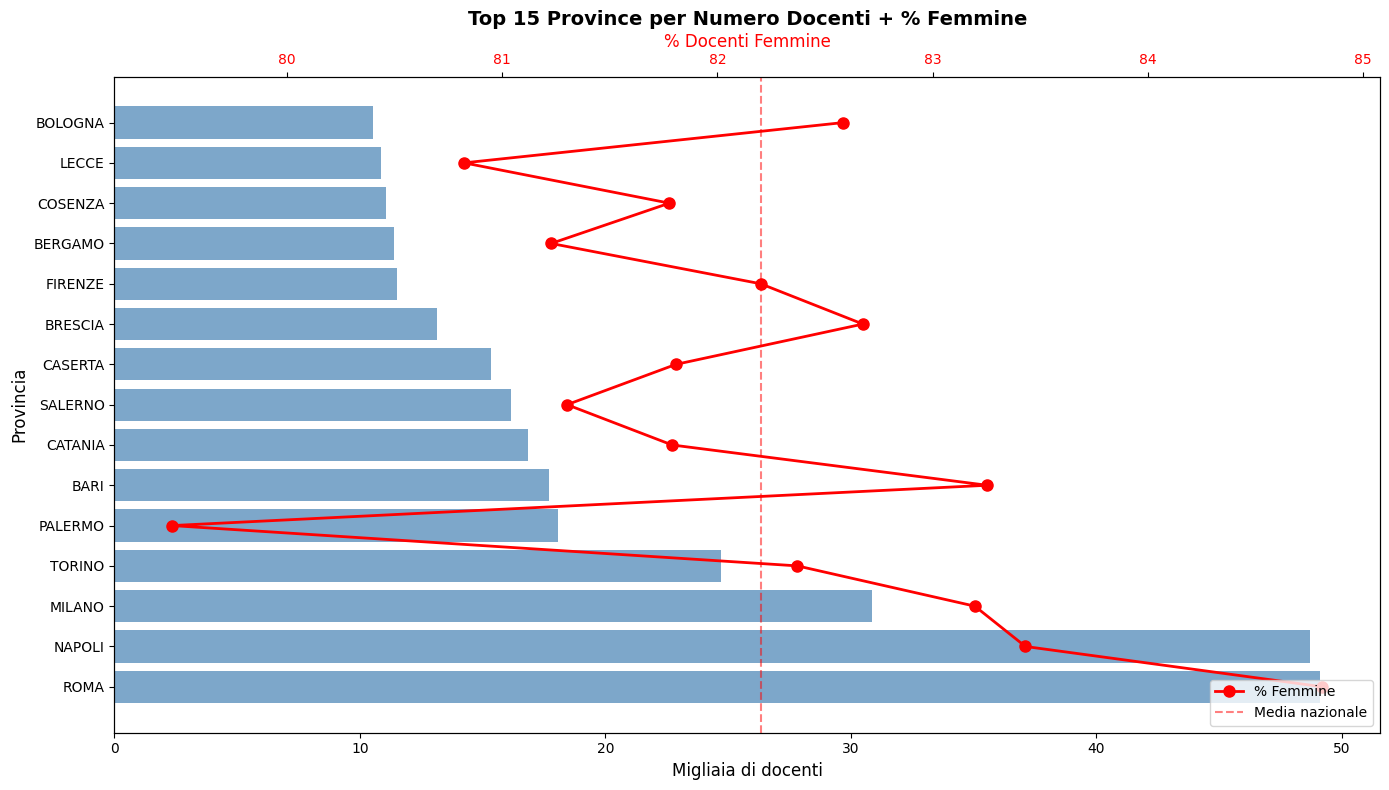

In [61]:
import matplotlib.pyplot as plt

# Top 15 province
geo_top15 = geo_dist.sort_values('TOTALE', ascending=False).head(15)

# Grafico a barre con doppia informazione
fig, ax1 = plt.subplots(figsize=(14, 8))

# Barre: numero totale docenti
bars = ax1.barh(geo_top15.index, geo_top15['TOTALE']/1000, color='steelblue', alpha=0.7)
ax1.set_xlabel('Migliaia di docenti', fontsize=12)
ax1.set_ylabel('Provincia', fontsize=12)
ax1.set_title('Top 15 Province per Numero Docenti + % Femmine', fontsize=14, fontweight='bold')

# Secondo asse Y: % femmine
ax2 = ax1.twiny()
ax2.plot(geo_top15['%FEMM'], geo_top15.index, 'ro-', linewidth=2, markersize=8, label='% Femmine')
ax2.set_xlabel('% Docenti Femmine', fontsize=12, color='red')
ax2.tick_params(axis='x', labelcolor='red')
ax2.axvline(82.2, color='red', linestyle='--', alpha=0.5, label='Media nazionale')
ax2.legend(loc='lower right')

plt.tight_layout()
plt.show()

In [62]:
gender_by_order.to_csv('gender_by_order.csv')
age_dist.to_csv('age_dist.csv')
geo_dist.to_csv('geo_dist.csv')

df.to_csv('personale_cleaned.csv', index=False)